# Handwritten Digit Recognizer

A popular demonstration of the capability of deep learning techniques is object recognition in image data. Recently. most of the image recognition is done by more complicated neural nets called convolutional neural nets. But here we will see how to do simple (and surprisingly accurate) image recognition using just feed forwards.

The “hello world” of object recognition for machine learning is the MNIST dataset for handwritten digit recognition.

In this post you will discover how to develop a deep learning model to achieve near state of the art performance on the MNIST handwritten digit recognition task in Python using the sklearn machine learning library.

After completing this tutorial, you will know:

- How to load the MNIST dataset.
- How to develop and evaluate a baseline neural network model for the MNIST problem.

Let’s get started.

In [84]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

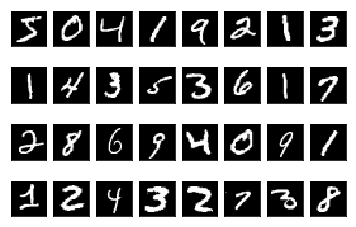

In [107]:
# load (will downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# scale the data
(X_train, y_train), (X_test, y_test) = (X_train / 255. , y_train), (X_test / 255., y_test)
# plot some of the images as gray scale
fig, axes = plt.subplots(4, 8)
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i], cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [115]:
# notice just a simple 1 hidden layer, 50 node network!
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

# mlp.fit(X_train.reshape(60000, 784), y_train)
X_test.shape

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


(10000, 28, 28)

### Visualization of MLP weights on MNIST


Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.

Training set score: 0.986800
Test set score: 0.970000


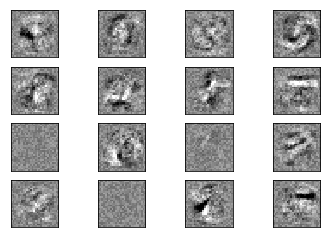

In [129]:
X_test.shape
print("Training set score: %f" % mlp.score(X_train.reshape(60000, 784), y_train))
print("Test set score: %f" % mlp.score(X_test.reshape(10000, 784), y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()